# Аттестация-1

**Оценка от 0 до 1, среднее по 4 критериям, 0.35 - пороговая для зачета**

## Типичные ошибки: за что снижал оценку
- Код не работает (ошибки). Исправлял по возможности и запускал. Недописанный код.
- Форма сдачи делает проверку затруднительной (pdf, тестовые файлы...)
- Полное отсутствие какого-либо из компонентов (нет описания шагов, отчета и выводов) или "Вывод: модель обучается!"
- Не выполнены компоненты задачи (визуализация батча, графики)
- Почти полная копия кода с Лекции / Практики
- Наивный `normalize` (0.5)
- Некорректные `transforms`

## За что НЕ снижал оценку:
- Эффективность архитектуры или алгоритма (финальные результаты обучения, скорость обучения)
- Некорректные утверждения в комментариях (если потом они не реализовывались на практике)
- Неудобство читаемости кода (часть слоев в виде струкутры в `init`, часть в виде функций в `forward`)
- Никто не зафиксировал `random.seed`

## За что добавлял оценку:
- Вдумчивые, пошаговые комментарии кода
- Подробный отчет, иногда в виде отдельного файла
- Аккуратность оформления кода, отчета
- Выход за пределы "рекомендуемого" (собственные датасет, дополнительные эксперименты, аугментации, возможности `torch`)
- Интересные технические находки
- Оригинальнпая (и работающая!) архитектура сети
- Дополниетльные схемы, поясняющие рисунки

## LeaderBoard
**Группа 1:**
- 5 высших оценок (1.0),
- 5 человек не отправляли работу,
- среднее по группе: 0.67

**Группа 2:**
- 4 высших оценок (1.0), 3 работы на пределе зачета (0.4),
- 4 человека не отправляли работу,
- среднее по группе: 0.625

## Инсайты
1. **Cучкова Мария.** Анализ предсказаний классов (первый эксперимент): что тут можно предположить?

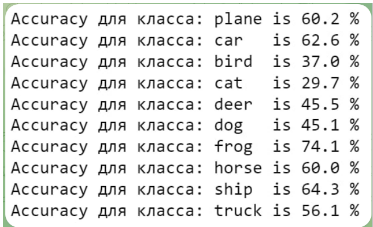

2. **Ляшко Александр.** Что необычного в этих графиках?

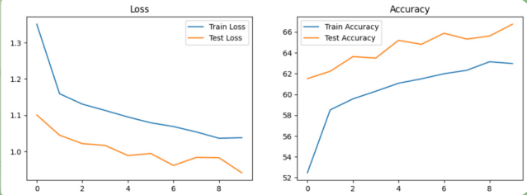

- https://discuss.pytorch.org/t/cant-explain-the-difference-test-loss-vs-train-loss/73869
- https://www.researchgate.net/post/Deep-Learning-What-are-the-possible-reasons-why-validation-test-loss-is-lower-than-training-loss

3. **Ирина Зимнухова.** Интересные графики!

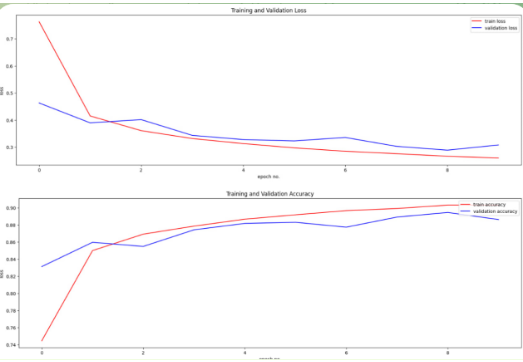

4. **Смаченко Алексей.** Странные результаты...

Обучение и тест первой версии модели:
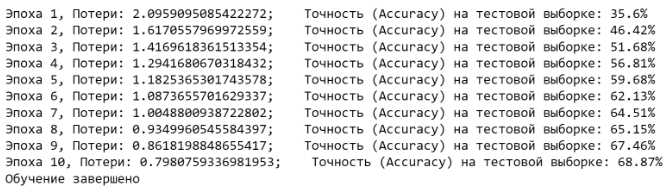


Изначальная `accuracy` д.б. 1/N, где N - число классов...

Обучение и тест второй версии модели (с Dropout):

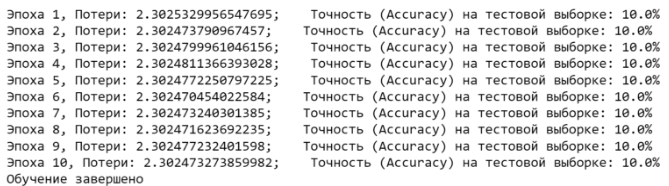

## P.S.
- Внимательность крайне важна (да, у вас было совсем немного времени)
- Больше слоев - не значит лучше результат (но почти наверняка больше издержки по времени)
- Дополниетльные техники вроде `Dropout` могут сыграть не только в плюс
- Визуализации необходимы! Это loss, accuracy на обучении и тесте, batch до обучения и batch где идут сравнения реальных меток и предсказаний модели
- Кто еще не сдал работы - сдавайте!

# OpenCV

**OpenCV** - богатейшая открытая (opensource) библиотека алгоритмов компьютерного зрения:
- Развивается и пополняется с 2000 г, в 2013 г переписана на python
- Несколько тысяч алгортитмов и процедур обработки изображений ("база", "классика", DL)
- Доступна на С++, Java и на python, c 2023 идет работа над OpenCV 5
- Поддержка GPU (CUDA, OpenCL)
- Поддержка Windows, Linux, OS X, Android и iOS
- Есть свои программы обучения, в т.ч. <a href='https://opencv.org/university/free-courses' a>базовые бесплатные курсы

## Зачем вам OpenCV?
- БАС-платформы: лимитированы по вычислительным мощностям и энергопотреблению - актуальность Edge AI подхода
- OpenCV много алгормитмов и процедур, решющих задачи эффективнее чем НС (небольшой компромисс по точности, но серьезный прирост скорости)
- "Ящик с тысячью инструментов": на первом этапе OpenCV можно рассматривать как библиотеку в прямром смысле слова: всегда найдется нужная функция

OpenCV имеет <a><a href='https://docs.opencv.org/4.10.0/d6/d00/tutorial_py_root.html' a>развитую документацию на python</a> по всем методам и функциям. 

## OK, но...
... ведь это все можно делать в условном PhotoShop или свободных аналогах, эконмитт время и не писать код!
- PhotoShop умеет многое из того что есть в OpenCV, но не все
- Возможности для автоматизации PhotoShop и OpenCV не сравнимы
- База: универсальные ЯП дают OpenCV доступ к приложению разработок в множестве сфер

In [41]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Общий синтаксис функций OpenCV

`retval =  cv2.imread(filename[, flags])`

- `retval` - возвращаемое значение (returned value): может быть связано с любым именем
- `cv2.` - обращение к корневому модулю OpenCV (cv2)
- `imread` - название функций (обычно говорящие названия, тут - image reading)
- `filename` - имя файла (объекта) - м.б. как открываемый файл, так и объект из кода
- `flags` - параметры для выполнения функцией операции (их разное число у разных функций, есть обязательные, есть опциональные - имеют знаения по умолчанию - default)

### Читаем изображение. Изображение - это Матрица, Нео!

<img src="https://www.dropbox.com/s/ed0r779b052o0s2/number_zero.jpg?dl=1" width=100>

**Функция `cv2.imread` - параметры:**
- `cv2.IMREAD_GRAYSCALE` или 0: изображение в grayscale (ЧБ)
- `cv2.IMREAD_COLOR` или 1: цветое изображение (без сохранения прозрачности) - default
- `cv2.IMREAD_UNCHANGED` или -1: изображение "как есть" - со всеми слоями, прозрачностью

In [42]:
testImage = cv2.imread("number_zero.jpg", 0)
print(testImage)

[[  1   0   3   0   3   0   3   2   4   2   0]
 [  0   1   0   3   3 253 253   0   0   2   1]
 [  0   0   8   0 249 255 255 253  71   1   5]
 [  3   0   2 251 255   2   0 253 254   0   2]
 [  1   5   0 252   4   0   3   0 255   4   0]
 [  0   0   2 255   0   0   0   3 253   0   4]
 [  0   5   4 249   4   2   0   0 255   1   0]
 [  2   0   0 255   3   0   5   0 254   0   4]
 [  0   0   0 255   1   0   0   3 255   0   0]
 [  1   5   0 252   2   2   2  76 250   7   0]
 [  0   0   5   0 254   0   0 255 254   0   1]
 [  0   8   0   3 253 253 255 250   1   2   1]
 [  2   0   0   0   5   0   4   1   3   0   0]]


- 0 - черный пиксель, 255 - белый, все что в промежутке - оттенки серого
- типичный (не единственный!) тип данных для изображений: unsigned int - `uint8` (целое положительное? т.е. без знака число) глубиной 8 бит (2<sup>8</sup> = 256)
- Размер (разрешение) изображения - 13x11 пикс, т.е. высота=13 и ширина=11 (13 строк и 11 столбцов)

### Важно!
В **OpenCV** размер изображения представлен парой чисел **width x height** или столбцы X строки. Но в **numpy** при вызове и обращении к массиву обратная нотация: **height x width**

In [43]:
testImage.dtype # тип данных uint8

dtype('uint8')

In [44]:
type(testImage) # изображения в OpenCV - массивы numpy

numpy.ndarray

In [45]:
testImage.shape # нотация numpy - height x width

(13, 11)

### Индексация в OpenCV

In [46]:
print(testImage[0, 0]) # стандартное обращение по паре чисел

1


In [47]:
testImage[0, 0] = 200
print(testImage)

[[200   0   3   0   3   0   3   2   4   2   0]
 [  0   1   0   3   3 253 253   0   0   2   1]
 [  0   0   8   0 249 255 255 253  71   1   5]
 [  3   0   2 251 255   2   0 253 254   0   2]
 [  1   5   0 252   4   0   3   0 255   4   0]
 [  0   0   2 255   0   0   0   3 253   0   4]
 [  0   5   4 249   4   2   0   0 255   1   0]
 [  2   0   0 255   3   0   5   0 254   0   4]
 [  0   0   0 255   1   0   0   3 255   0   0]
 [  1   5   0 252   2   2   2  76 250   7   0]
 [  0   0   5   0 254   0   0 255 254   0   1]
 [  0   8   0   3 253 253 255 250   1   2   1]
 [  2   0   0   0   5   0   4   1   3   0   0]]


### Срезы массивов

In [48]:
test = testImage[0:2, 0:4] # [от:до по столбцам, от:до по строкам]

In [49]:
test

array([[200,   0,   3,   0],
       [  0,   1,   0,   3]], dtype=uint8)

In [50]:
testImage[0:2, 0:4] = 111
testImage

array([[111, 111, 111, 111,   3,   0,   3,   2,   4,   2,   0],
       [111, 111, 111, 111,   3, 253, 253,   0,   0,   2,   1],
       [  0,   0,   8,   0, 249, 255, 255, 253,  71,   1,   5],
       [  3,   0,   2, 251, 255,   2,   0, 253, 254,   0,   2],
       [  1,   5,   0, 252,   4,   0,   3,   0, 255,   4,   0],
       [  0,   0,   2, 255,   0,   0,   0,   3, 253,   0,   4],
       [  0,   5,   4, 249,   4,   2,   0,   0, 255,   1,   0],
       [  2,   0,   0, 255,   3,   0,   5,   0, 254,   0,   4],
       [  0,   0,   0, 255,   1,   0,   0,   3, 255,   0,   0],
       [  1,   5,   0, 252,   2,   2,   2,  76, 250,   7,   0],
       [  0,   0,   5,   0, 254,   0,   0, 255, 254,   0,   1],
       [  0,   8,   0,   3, 253, 253, 255, 250,   1,   2,   1],
       [  2,   0,   0,   0,   5,   0,   4,   1,   3,   0,   0]],
      dtype=uint8)

### Визуализация изображений

Для этого в OpenCV можно использовать:
1. Matplotlib: `None = plt.imshow(img)`
1. Собственное окно OpenCV: `None = cv2.imshow(winname, mat)`
- `winname` - имя окна
- `mat` - matrix, т.е. изображение, которое отображается

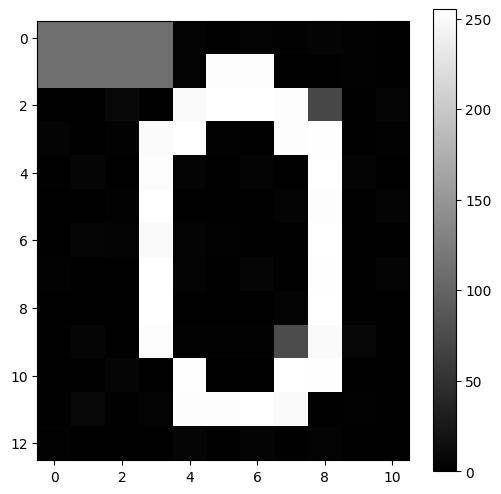

In [51]:
# настройки отображения Matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

plt.imshow(testImage)
plt.colorbar()

In [52]:
boy = cv2.imread("boy.jpg") # Чтение изображения
cv2.imshow("Boy", boy) # Вывод изоброжения

cv2.waitKey(0) # Ожидание нажатия клавиши (0 - любой)
cv2.destroyAllWindows() # При нажатии cv2.waitKey(0) код выполняется далее - закрытие всех окон

###  Сохранение изображений

Функция для записи изображений на диск (при удачном сохранении вернет значение `True`):

`retval = cv2.imwrite(filename, img [, params])`

- `filename` - абсолютный или относительный путь, куда сохранится изображение
- `img` - имя самого объекта изображения
- `params` - дополнительные параметры (JPEG-компрессия и другие), <a href='https://docs.opencv.org/4.1.0/d4/da8/group__imgcodecs.html#ga292d81be8d76901bff7988d18d2b42ac' a> документация

In [53]:
cv2.imwrite("testImage.jpg",testImage) # по умолчанию сохранит в директрию со скриптом

True